In [1]:
# Run this to check if your version of Anaconda includes the pandas module

# import with a naming alias
import pandas as pd     

# Series is a pandas data structure 
# think of it as a cross between a list and a dict
from pandas import Series  

In [7]:
# warmup 1: recall what we can do with lists
nums1 =  [5, 10, 15, 20]

nums1 * 2
# Q: Which of the following do NOT work ? Try n+,  -,   /


[5, 10, 15, 20, 5, 10, 15, 20]

In [3]:
# warmup 2: concatenate nums1 and nums 2 , store in nums3
nums2 = [7, 14, 21]
nums3 = nums1 + nums2
nums3

[5, 10, 15, 20, 7, 14, 21]

### Lecture 27: Pandas Series
**Learning Objectives**

27.1 Use correct Pandas terms when working with a Series
- index
- integer position

27.2 Create and use Pandas Series objects
- from a dictionary
- from a list

27.3 Use proper Pandas Series syntax to
- access elements
- slice
- perform element-wise operations using a scalar or another Series
- concatenate two Series

27.4 Use Boolean expressions and binary operators to slice a Series



In [29]:
# Let's make a  dictionary 

d = { "Wisconsin": "Madison", "Minnesota": "St. Paul", "Michigan": "Lansing", 
     "Iowa": "Des Moines" , "Illinois":"Springfield"}
d

{'Wisconsin': 'Madison',
 'Minnesota': 'St. Paul',
 'Michigan': 'Lansing',
 'Iowa': 'Des Moines',
 'Illinois': 'Springfield'}

In [30]:
# Now let's turn it into a Series
# s stands for series
s = pd.Series(d)
s

Wisconsin        Madison
Minnesota       St. Paul
Michigan         Lansing
Iowa          Des Moines
Illinois     Springfield
dtype: object


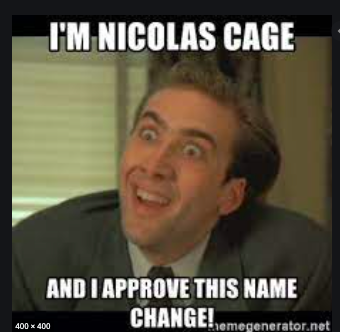

## Name Change Alert
- A dictionary 'key' is called an 'index' in Pandas
- An 'index position' gives the ordering of each value in the Pandas Series
- Use <code> .loc[index] </code> to access the value **associated** with an index of a Series (like a dict)
- Use <code> .iloc[integer position] </code> to access the value at an integer position of a Series  (like a list)
- Also can just use <code> s[key] </code> or <code> s[integer position] </code> to access the value

In [31]:
s.loc["Iowa"]  #Zach is the index, 1 is the value

'Des Moines'

In [32]:
# Do Now.  Print out the value associated with a given 'index' four different ways.
# the first one is done for you
print(s["Michigan"])

# using .loc
print(s.loc["Iowa"])

# using .iloc with an integer position
print(s.iloc[2])

# using .iloc with a negative integer position
print(s.iloc[-1])

# using s[i] where i is an integer position
print(s[3])

# using s[i] where i is a negative integer position
print(s[-1])

Lansing
Des Moines
Lansing
Springfield
Des Moines
Springfield


### Part A: Pandas can use [ ] with a list of indices or a list of integer positions

In [34]:
# reminder what our Series is
s

Wisconsin        Madison
Minnesota       St. Paul
Michigan         Lansing
Iowa          Des Moines
Illinois     Springfield
dtype: object

In [35]:
# guess what this will produce....they try it
s[[3, 1, 2]]   # list of integer positions


Iowa         Des Moines
Minnesota      St. Paul
Michigan        Lansing
dtype: object

In [36]:
# produce the values for "Michigan" and "Minnesota" using their names
s[ [  "Michigan", "Minnesota" ]  ]   # list of indices

Michigan      Lansing
Minnesota    St. Paul
dtype: object

In [37]:
# you can change the value associated with an index
# Set Iowa to have the value "Iowa City"
s["Iowa"] = "Iowa City"

In [38]:
# you can add a new index, value pair just like in a dictionary
# add the capitol of Montana
s["Montana"] = "Helena"
s

Wisconsin        Madison
Minnesota       St. Paul
Michigan         Lansing
Iowa           Iowa City
Illinois     Springfield
Montana           Helena
dtype: object

### Part B: Slicing a Series
- you can slice a Series with indices
- you can slice a Series with integer positions (but not negative ones)

In [39]:
# reminder of what our Series is
s

Wisconsin        Madison
Minnesota       St. Paul
Michigan         Lansing
Iowa           Iowa City
Illinois     Springfield
Montana           Helena
dtype: object

In [40]:
# try slicing s with integer positions, just like you would for do for a list
s[1:4]

Minnesota     St. Paul
Michigan       Lansing
Iowa         Iowa City
dtype: object

In [41]:
# can you do this with negative integer positions?  try it!
s[-3:-1]

Iowa          Iowa City
Illinois    Springfield
dtype: object

In [42]:
# try slicing with indices ( names)
s["Wisconsin":"Michigan"]

Wisconsin     Madison
Minnesota    St. Paul
Michigan      Lansing
dtype: object

In [43]:
# can you slice in reverse?  try it !
s["Michigan" : "Wisconsin"]

Series([], dtype: object)

### Part C: A Series can be made from a list
- the Integer Position becomes the Index


In [48]:
# buildings
buildings = pd.Series(["Van Vleck", "Birge", "Noland", "Van Hise", "Humanities", "Education"])
buildings

0     Van Vleck
1         Birge
2        Noland
3      Van Hise
4    Humanities
5     Education
dtype: object

In [56]:
# in this situation, .loc and .iloc give the same result
# try it now in the space below
print(buildings.loc[0])  # the number is the index
print(buildings.iloc[0]) # the number is the index


# do negative indices work? Try it with .iloc
print(buildings.iloc[-1])



Van Vleck
Van Vleck
Education


**When you SLICE a Series made from a list, Pandas renumbers the integer positions but indices do not change**

In [60]:
sliced_buildings = buildings[3:5]
sliced_buildings

3      Van Hise
4    Humanities
dtype: object

In [61]:
# access one part of the slice by using iloc
sliced_buildings.iloc[0]
# that's confusing!!!

'Van Hise'

In [66]:
# access Humanities by using loc
sliced_buildings.loc[4]

'Humanities'

### Part D: Pandas allows you to perform an operation on every element of a Series
- scalar arithmetic
- function calls on numbers
- function calls on strings

In [73]:
score = pd.Series([32.25, 22.667, 29.5, 30.333])
score + 3

0    35.250
1    25.667
2    32.500
3    33.333
dtype: float64

In [74]:
# divide each score by 35, then multiply by 100, then round to 1 dp
round(score/35*100)

0    92.0
1    65.0
2    84.0
3    87.0
dtype: float64

In [76]:
# make a Series of strings
# call a string function on it by using .str._____

activities = pd.Series(["bicycling", "YOGA", "walking", "running", "swimming" ])
activities.str.lower()

0    bicycling
1         yoga
2      walking
3      running
4     swimming
dtype: object

In [78]:
activities.str.count("i")

0    2
1    0
2    1
3    1
4    2
dtype: int64

### Part E: Pandas allows operations on pairwise elements of Series with equal lengths
- arithmetic operators
- relational operators 
- can match up two series by indices

In [90]:
evens = pd.Series([2, 4, 6, 8])
odds = pd.Series([1, 3, 5, 7])
print(evens * odds)

0     2
1    12
2    30
3    56
dtype: int64


In [91]:
# try dividing
evens / odds

0    2.000000
1    1.333333
2    1.200000
3    1.142857
dtype: float64

In [92]:
# try evens ** odds
evens ** odds

0          2
1         64
2       7776
3    2097152
dtype: int64

In [93]:
# try <
evens < odds

0    False
1    False
2    False
3    False
dtype: bool

In [83]:
# Pandas can peform operations on two series
scores1 = pd.Series([200, 500, 100])
scores2 = pd.Series([22, 84, 19])
scores1 - scores2

0    178
1    416
2     81
dtype: int64

In [86]:
# even if they are different lengths
scores1 = pd.Series([200, 500, 100, 800])
scores2 = pd.Series([22, 84, 19])
scores1 + scores2

0    222.0
1    584.0
2    119.0
3      NaN
dtype: float64

In [87]:
# adding two series with same indices (mostly)
points1 = pd.Series({ "Albert": 300, "Briana": 100, "Carli": 300, "Paul": 1200, "Sara": 900, })
points2 = pd.Series({"Briana": 11, "Carli": 3, "Paul": 2, "Sara":52})
points1 + points2

Albert       NaN
Briana     111.0
Carli      303.0
Paul      1202.0
Sara       952.0
dtype: float64

### Part F. Pandas does cool stuff with Booleans as selectors

In [95]:
# make a Series that contains 5 True/False values
evens = pd.Series([2, 4, 6, 8])
odds = pd.Series([1, 3, 5, 7])
selector = pd.Series([True, False, False, True, True])
evens [selector]

0    2
3    8
dtype: int64

In [96]:
evens = pd.Series([2, 4, 6, 8])
mod3 = evens % 3 == 0
print(mod3)

0    False
1    False
2     True
3    False
dtype: bool


In [98]:
# combine the two ideas from above using [ ] 
print(evens[selector])
print(evens[mod3])

0    2
3    8
dtype: int64
2    6
dtype: int64


In [99]:
# a selector can be used on strings as well
activities

0    bicycling
1         YOGA
2      walking
3      running
4     swimming
dtype: object

In [102]:
# make a Series of all strings are all uppercase
activities[activities == activities.str.upper()]

1    YOGA
dtype: object

In [103]:
activities[activities.str.find("ing") > 0 ] 

0    bicycling
2      walking
3      running
4     swimming
dtype: object

In [109]:
# set numbers to be a pd.Series containing 34, 55, 27, 81, 93, 73, 56, 22, 15, 46
numbers = pd.Series([34, 55, 27, 81, 93, 73, 56, 22, 15, 46])

# find the values in numbers such that numbers % 3 == 0
numbers[numbers % 3 == 0]

2    27
3    81
4    93
8    15
dtype: int64

### Part G: Pandas uses binary logical operators instead of words
- and is <code> & </code>
- or  is <code> | </code> (above enter....called 'vertical bar' )
- not is <code> ~ </code> (above tab....called 'tilde' )
- use parentheses to separate boolean expressions  (binary operators have highest precedence)

In [158]:
# find numbers that are > 22 and < 50
numbers [(numbers > 22) & (numbers < 50)]

0    34
2    27
9    46
dtype: int64

In [160]:
# find numbers that are odd or > 30

In [161]:
# find numbers that are not multiples of 5


0    34
2    27
3    81
4    93
5    73
6    56
7    22
9    46
dtype: int64

### Part H: Other Pandas tips
- the concat function accepts a list of Series and will duplicate indices if they are repeated
- a Series can be converted to a dict or a list

In [108]:
# try it now
combo = pd.concat([odds, evens, threes])
combo

0     1
1     3
2     5
3     7
0     2
1     4
2     6
3     8
0     3
1     6
2     9
3    12
4    15
dtype: int64

In [109]:
# and the .loc command has multiple  answers
combo.loc[0]

0    1
0    2
0    3
dtype: int64

In [110]:
# what about .iloc?  Try it


5

In [167]:
# convert one of the series in this notebook to a dict

In [ ]:
# convers one of the series in this notebook to a list